In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 


Data Source = https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge

In [2]:
WORK_DIR = os.getcwd()

In [3]:
DATA_DIR = WORK_DIR + '/data'

In [4]:
data = pd.read_csv(DATA_DIR + '/train.csv')

In [5]:
data_ = pd.read_csv(DATA_DIR + '/test.csv')

In [6]:
merged_df = pd.concat([data, data_], axis=0)


In [7]:
merged_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [8]:
merged_df.shape

(98171, 12)

In [9]:
merged_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,98171.000000,98171.000000,98171.000000,9.817100e+04,98171.000000,98171.000000,98171.000000,98171.000000,29451.000000
mean,0.177517,0.316947,2.389423,7.874292e+03,0.822483,0.932322,21.291708,76.894881,142.898746
std,0.382107,0.465289,0.868954,1.050427e+06,0.382107,0.251194,6.186898,10.240142,656.880713
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000277e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175007e+03,1.000000,1.000000,20.904426,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.550388e+03,1.000000,1.000000,26.893640,77.968485,100.000000
max,1.000000,1.000000,31.000000,2.545455e+08,1.000000,1.000000,65.183330,175.278040,30000.000000


In [10]:
set(merged_df['UNDER_CONSTRUCTION']) #True False Condetion

{0, 1}

In [11]:
set(merged_df['RERA'])#True False Condetion

{0, 1}

In [12]:
set(merged_df['BHK_NO.']) #Rooms No.

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 31}

In [13]:
numerical_data = merged_df[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','TARGET(PRICE_IN_LACS)']]

<Axes: >

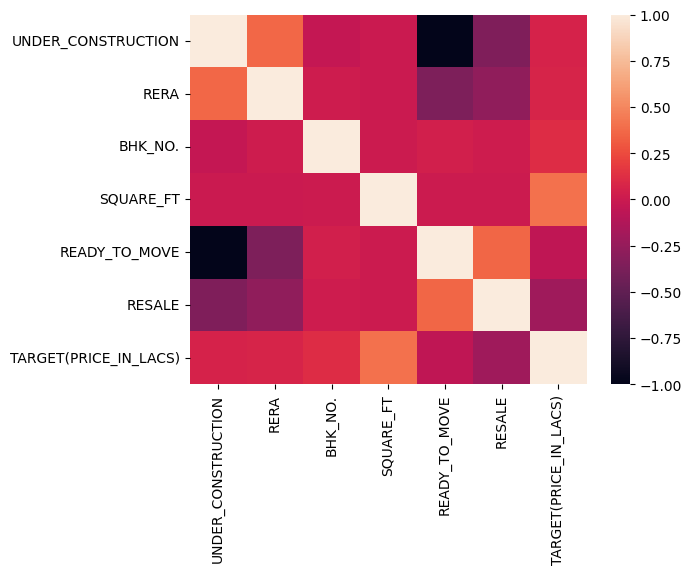

In [14]:
sns.heatmap(numerical_data.corr())

<Axes: xlabel='SQUARE_FT', ylabel='BHK_NO.'>

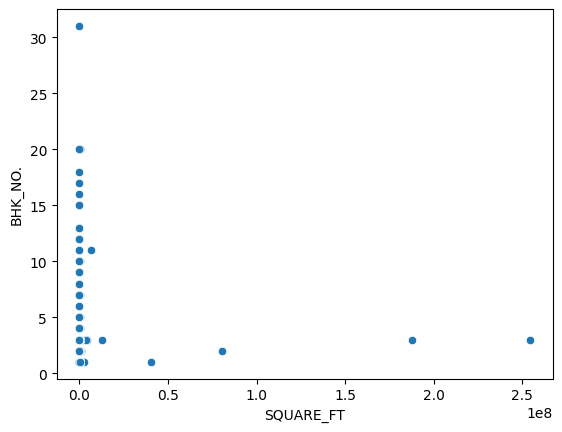

In [15]:
sns.scatterplot(data= numerical_data, x='SQUARE_FT', y='BHK_NO.') #Indicate that there is missing values filled with 0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1d85e8350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1d85e9a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1d85fb710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1d85eb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1d85ebc90>],
 'means': []}

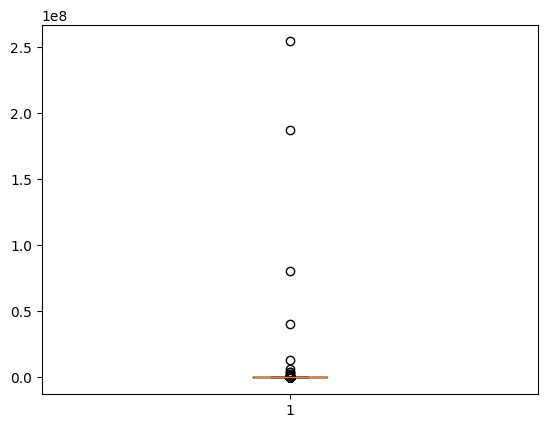

In [16]:
plt.boxplot(numerical_data['SQUARE_FT'])


In [17]:
len(numerical_data[numerical_data['SQUARE_FT'] > 0.5*10**6]) #5*10**5 is the threashold

14

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1d82d3790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1d82c0b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1d82d2c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1d82c21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1d82c2cd0>],
 'means': []}

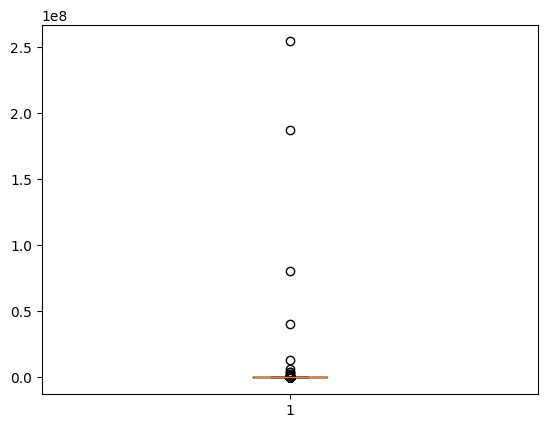

In [18]:
plt.boxplot(numerical_data['SQUARE_FT'])


<Axes: xlabel='SQUARE_FT', ylabel='BHK_NO.'>

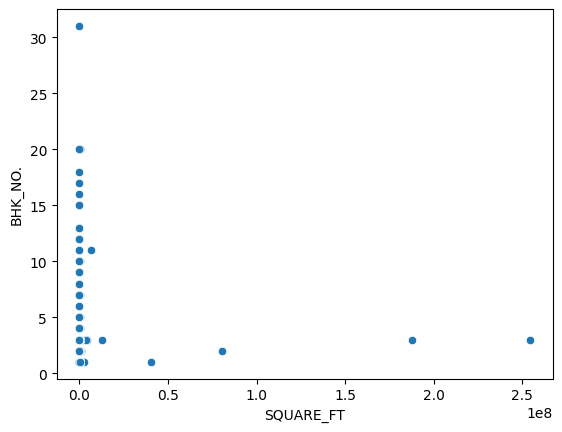

In [19]:
sns.scatterplot(data= numerical_data, x='SQUARE_FT', y='BHK_NO.') 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1d8150290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1d8151a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1d8167750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1d8152f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1d8153a50>],
 'means': []}

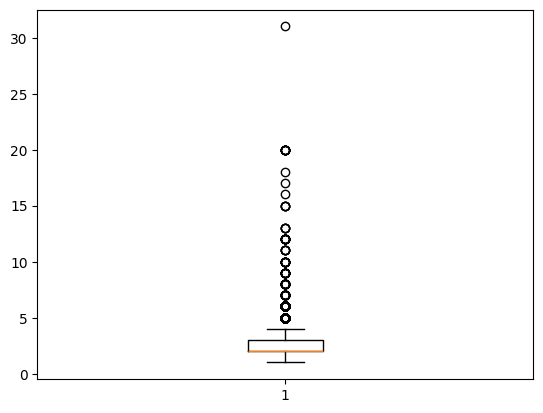

In [20]:
plt.boxplot(numerical_data['BHK_NO.'])


In [21]:
true = len(numerical_data[numerical_data['READY_TO_MOVE'] == 1])
false = len(numerical_data[numerical_data['READY_TO_MOVE'] == 0])
true, false

(80744, 17427)

In [22]:
true = len(numerical_data[numerical_data['RERA'] == 1])
false = len(numerical_data[numerical_data['RERA'] == 0])
true, false

(31115, 67056)

In [23]:
numerical_data = numerical_data[numerical_data['SQUARE_FT'] < 0.5*10**6]

<Axes: xlabel='SQUARE_FT', ylabel='BHK_NO.'>

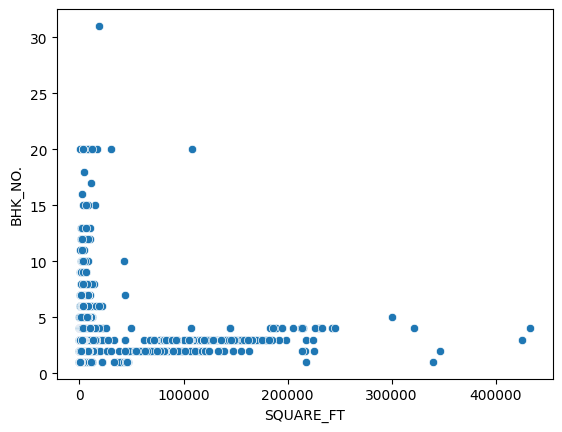

In [24]:
sns.scatterplot(data= numerical_data, x='SQUARE_FT', y='BHK_NO.') 

<Axes: >

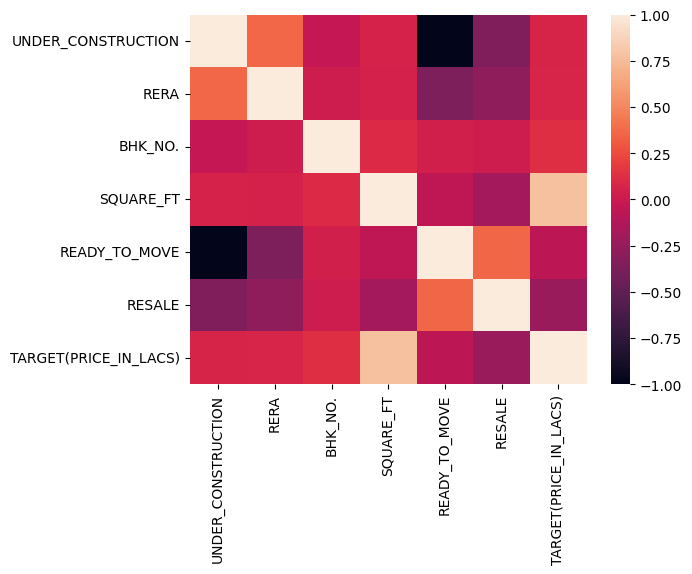

In [25]:
sns.heatmap(numerical_data.corr())

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

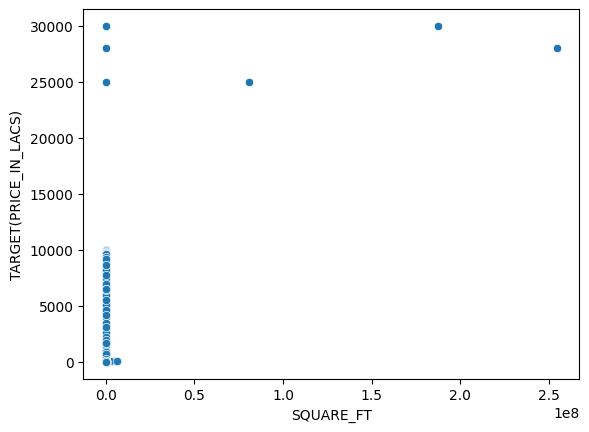

In [26]:
sns.scatterplot(data=merged_df, y = 'TARGET(PRICE_IN_LACS)', x = 'SQUARE_FT')

In [27]:
merged_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,98171.000000,98171.000000,98171.000000,9.817100e+04,98171.000000,98171.000000,98171.000000,98171.000000,29451.000000
mean,0.177517,0.316947,2.389423,7.874292e+03,0.822483,0.932322,21.291708,76.894881,142.898746
std,0.382107,0.465289,0.868954,1.050427e+06,0.382107,0.251194,6.186898,10.240142,656.880713
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000277e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175007e+03,1.000000,1.000000,20.904426,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.550388e+03,1.000000,1.000000,26.893640,77.968485,100.000000
max,1.000000,1.000000,31.000000,2.545455e+08,1.000000,1.000000,65.183330,175.278040,30000.000000


In [28]:

numerical_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
count,98157.000000,98157.000000,98157.000000,98157.000000,98157.000000,98157.000000,29445.000000
mean,0.177542,0.316992,2.389335,1786.445985,0.822458,0.932313,140.104516
std,0.382129,0.465307,0.868540,7878.840436,0.382129,0.251210,594.941092
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,900.027693,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1175.000000,1.000000,1.000000,62.000000
75%,0.000000,1.000000,3.000000,1550.387597,1.000000,1.000000,100.000000
max,1.000000,1.000000,31.000000,433333.333300,1.000000,1.000000,9990.000000


# Feature Engineering

In [29]:
df = merged_df

In [30]:
df = df[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','TARGET(PRICE_IN_LACS)','BHK_OR_RK','POSTED_BY','LONGITUDE','LATITUDE']]

In [31]:
df = df[df['SQUARE_FT'] <= 300000]

In [32]:
df = df[df['TARGET(PRICE_IN_LACS)'] < 25000]

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

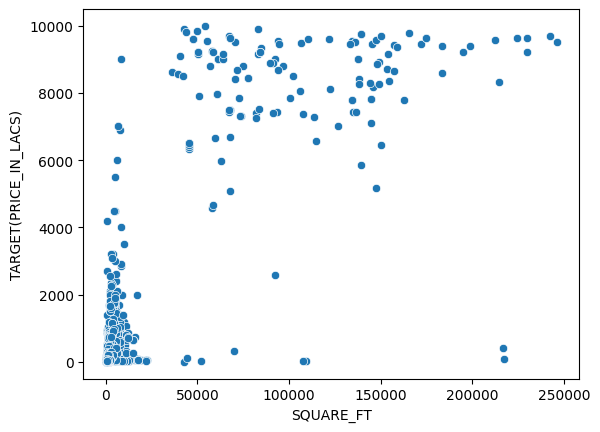

In [33]:
sns.scatterplot(data=df, y = 'TARGET(PRICE_IN_LACS)', x = 'SQUARE_FT')

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

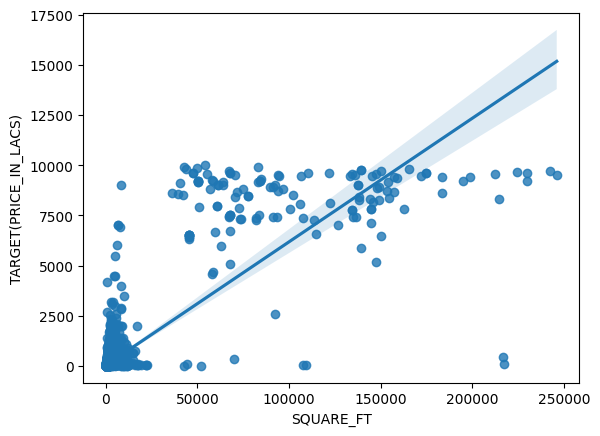

In [34]:
sns.regplot(data=df, y = 'TARGET(PRICE_IN_LACS)', x = 'SQUARE_FT')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
BHK_OR_RK_encoder = LabelEncoder()
POSTED_BY_encoder = LabelEncoder()

In [37]:
df['BHK_OR_RK'] = BHK_OR_RK_encoder.fit_transform(df['BHK_OR_RK'])

In [38]:
set(df['BHK_OR_RK'])

{0, 1}

In [39]:
df['POSTED_BY'] = POSTED_BY_encoder.fit_transform(df['POSTED_BY'])

In [40]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),BHK_OR_RK,POSTED_BY,LONGITUDE,LATITUDE
0,0,0,2,1300.236407,1,1,55.0,0,2,12.969910,77.597960
1,0,0,2,1275.000000,1,1,51.0,0,1,12.274538,76.644605
2,0,0,2,933.159722,1,1,43.0,0,2,12.778033,77.632191
3,0,1,2,929.921143,1,1,62.5,0,2,28.642300,77.344500
4,1,0,2,999.009247,0,1,60.5,0,1,22.592200,88.484911


<Axes: >

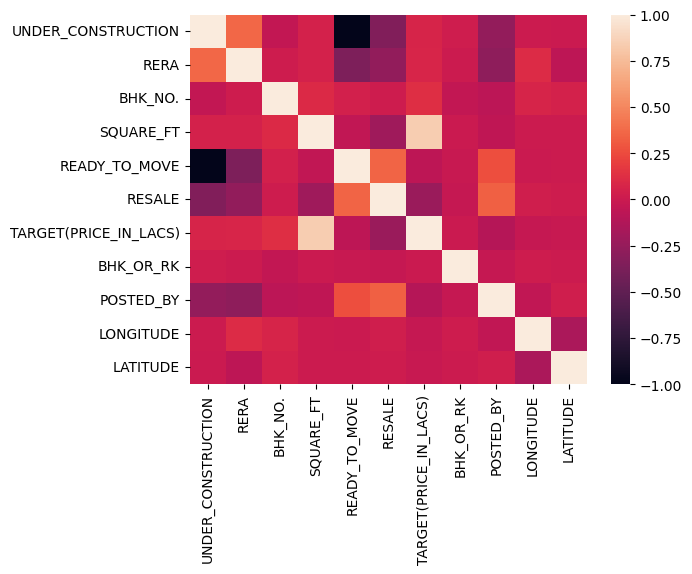

In [41]:
sns.heatmap(df.corr())

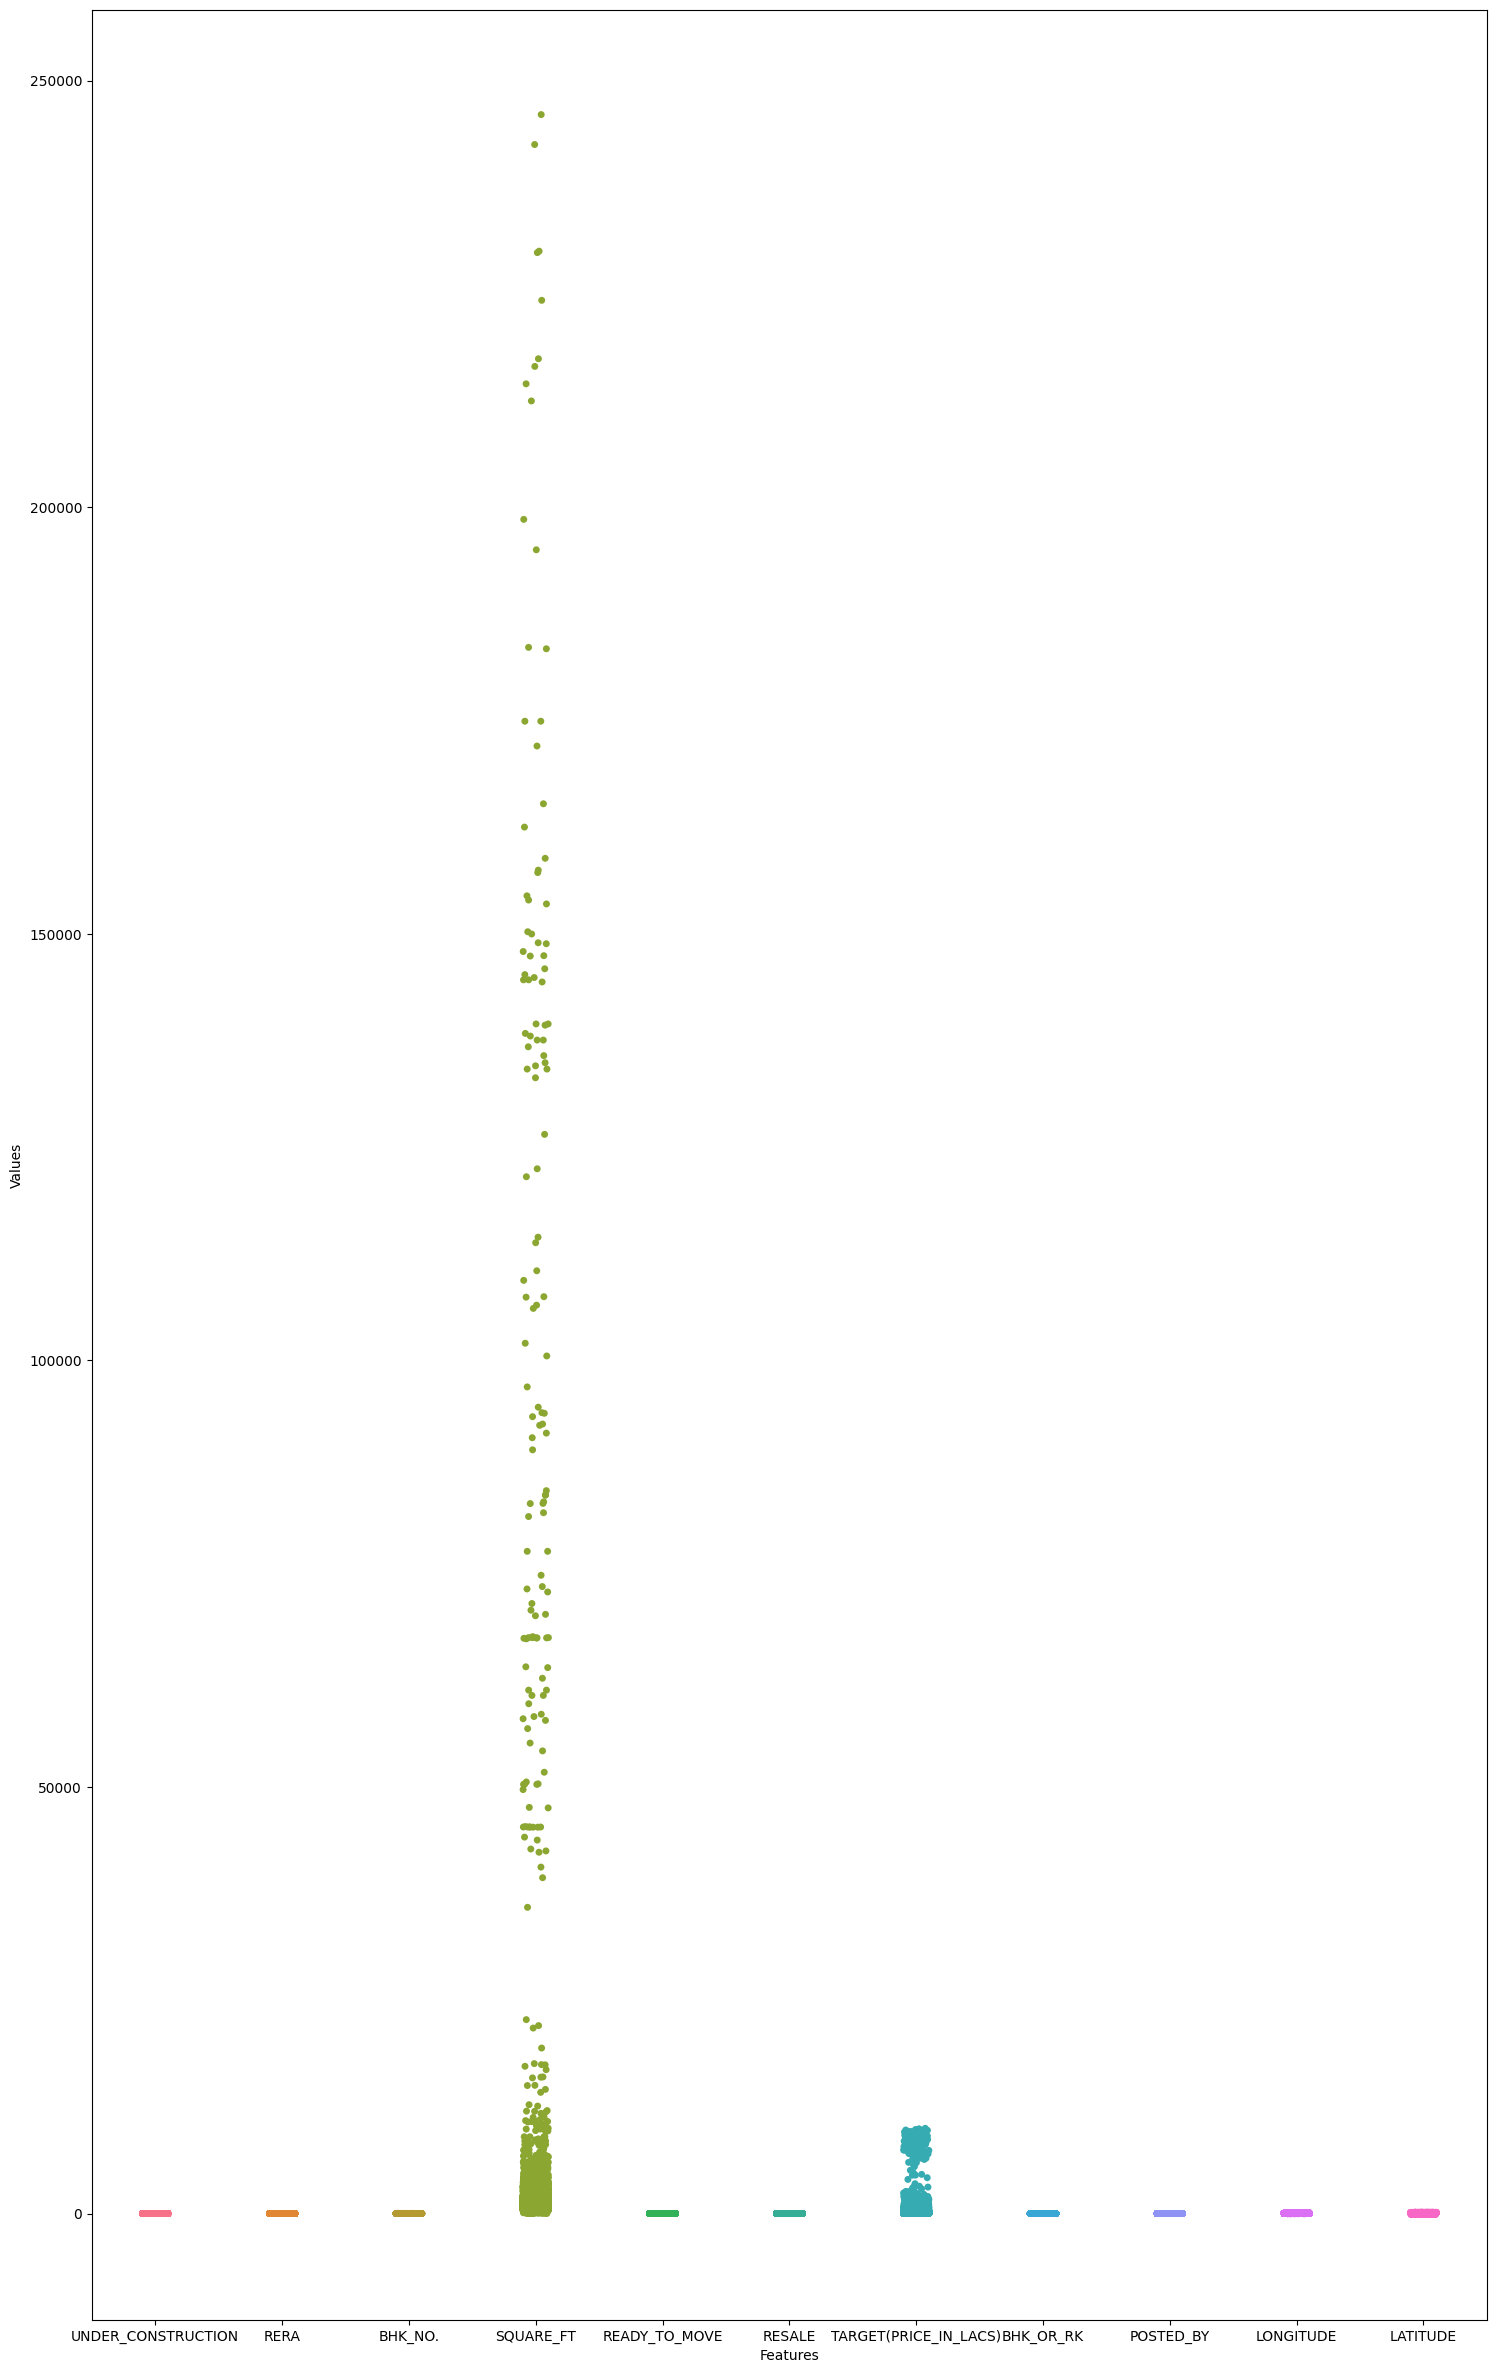

In [42]:
plt.figure(figsize=(18,30))
sns.stripplot(data=df)
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [43]:
def detect_outliers_z_score(data, threshold=3):

    z_scores = (data - np.mean(data)) / np.std(data)
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    return outlier_indices

In [44]:
df_max_scaled = df.copy() 
  
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      

display(df_max_scaled)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),BHK_OR_RK,POSTED_BY,LONGITUDE,LATITUDE
0,0.0,0.0,0.10,0.005285,1.0,1.0,0.005506,0.0,1.0,0.216479,0.507300
1,0.0,0.0,0.10,0.005183,1.0,1.0,0.005105,0.0,0.5,0.204873,0.501067
2,0.0,0.0,0.10,0.003793,1.0,1.0,0.004304,0.0,1.0,0.213277,0.507524
3,0.0,1.0,0.10,0.003780,1.0,1.0,0.006256,0.0,1.0,0.478066,0.505643
4,1.0,0.0,0.10,0.004061,0.0,1.0,0.006056,0.0,0.5,0.377084,0.578474
...,...,...,...,...,...,...,...,...,...,...,...
29446,0.0,0.0,0.15,0.010162,1.0,1.0,0.004505,0.0,1.0,0.453001,0.510211
29447,0.0,0.0,0.10,0.003127,1.0,1.0,0.001602,0.0,1.0,0.666725,-0.563214
29448,0.0,0.0,0.10,0.004157,1.0,1.0,0.002713,0.0,0.5,0.449466,0.495729
29449,0.0,0.0,0.10,0.003768,1.0,1.0,0.006707,0.0,1.0,0.215315,0.524493


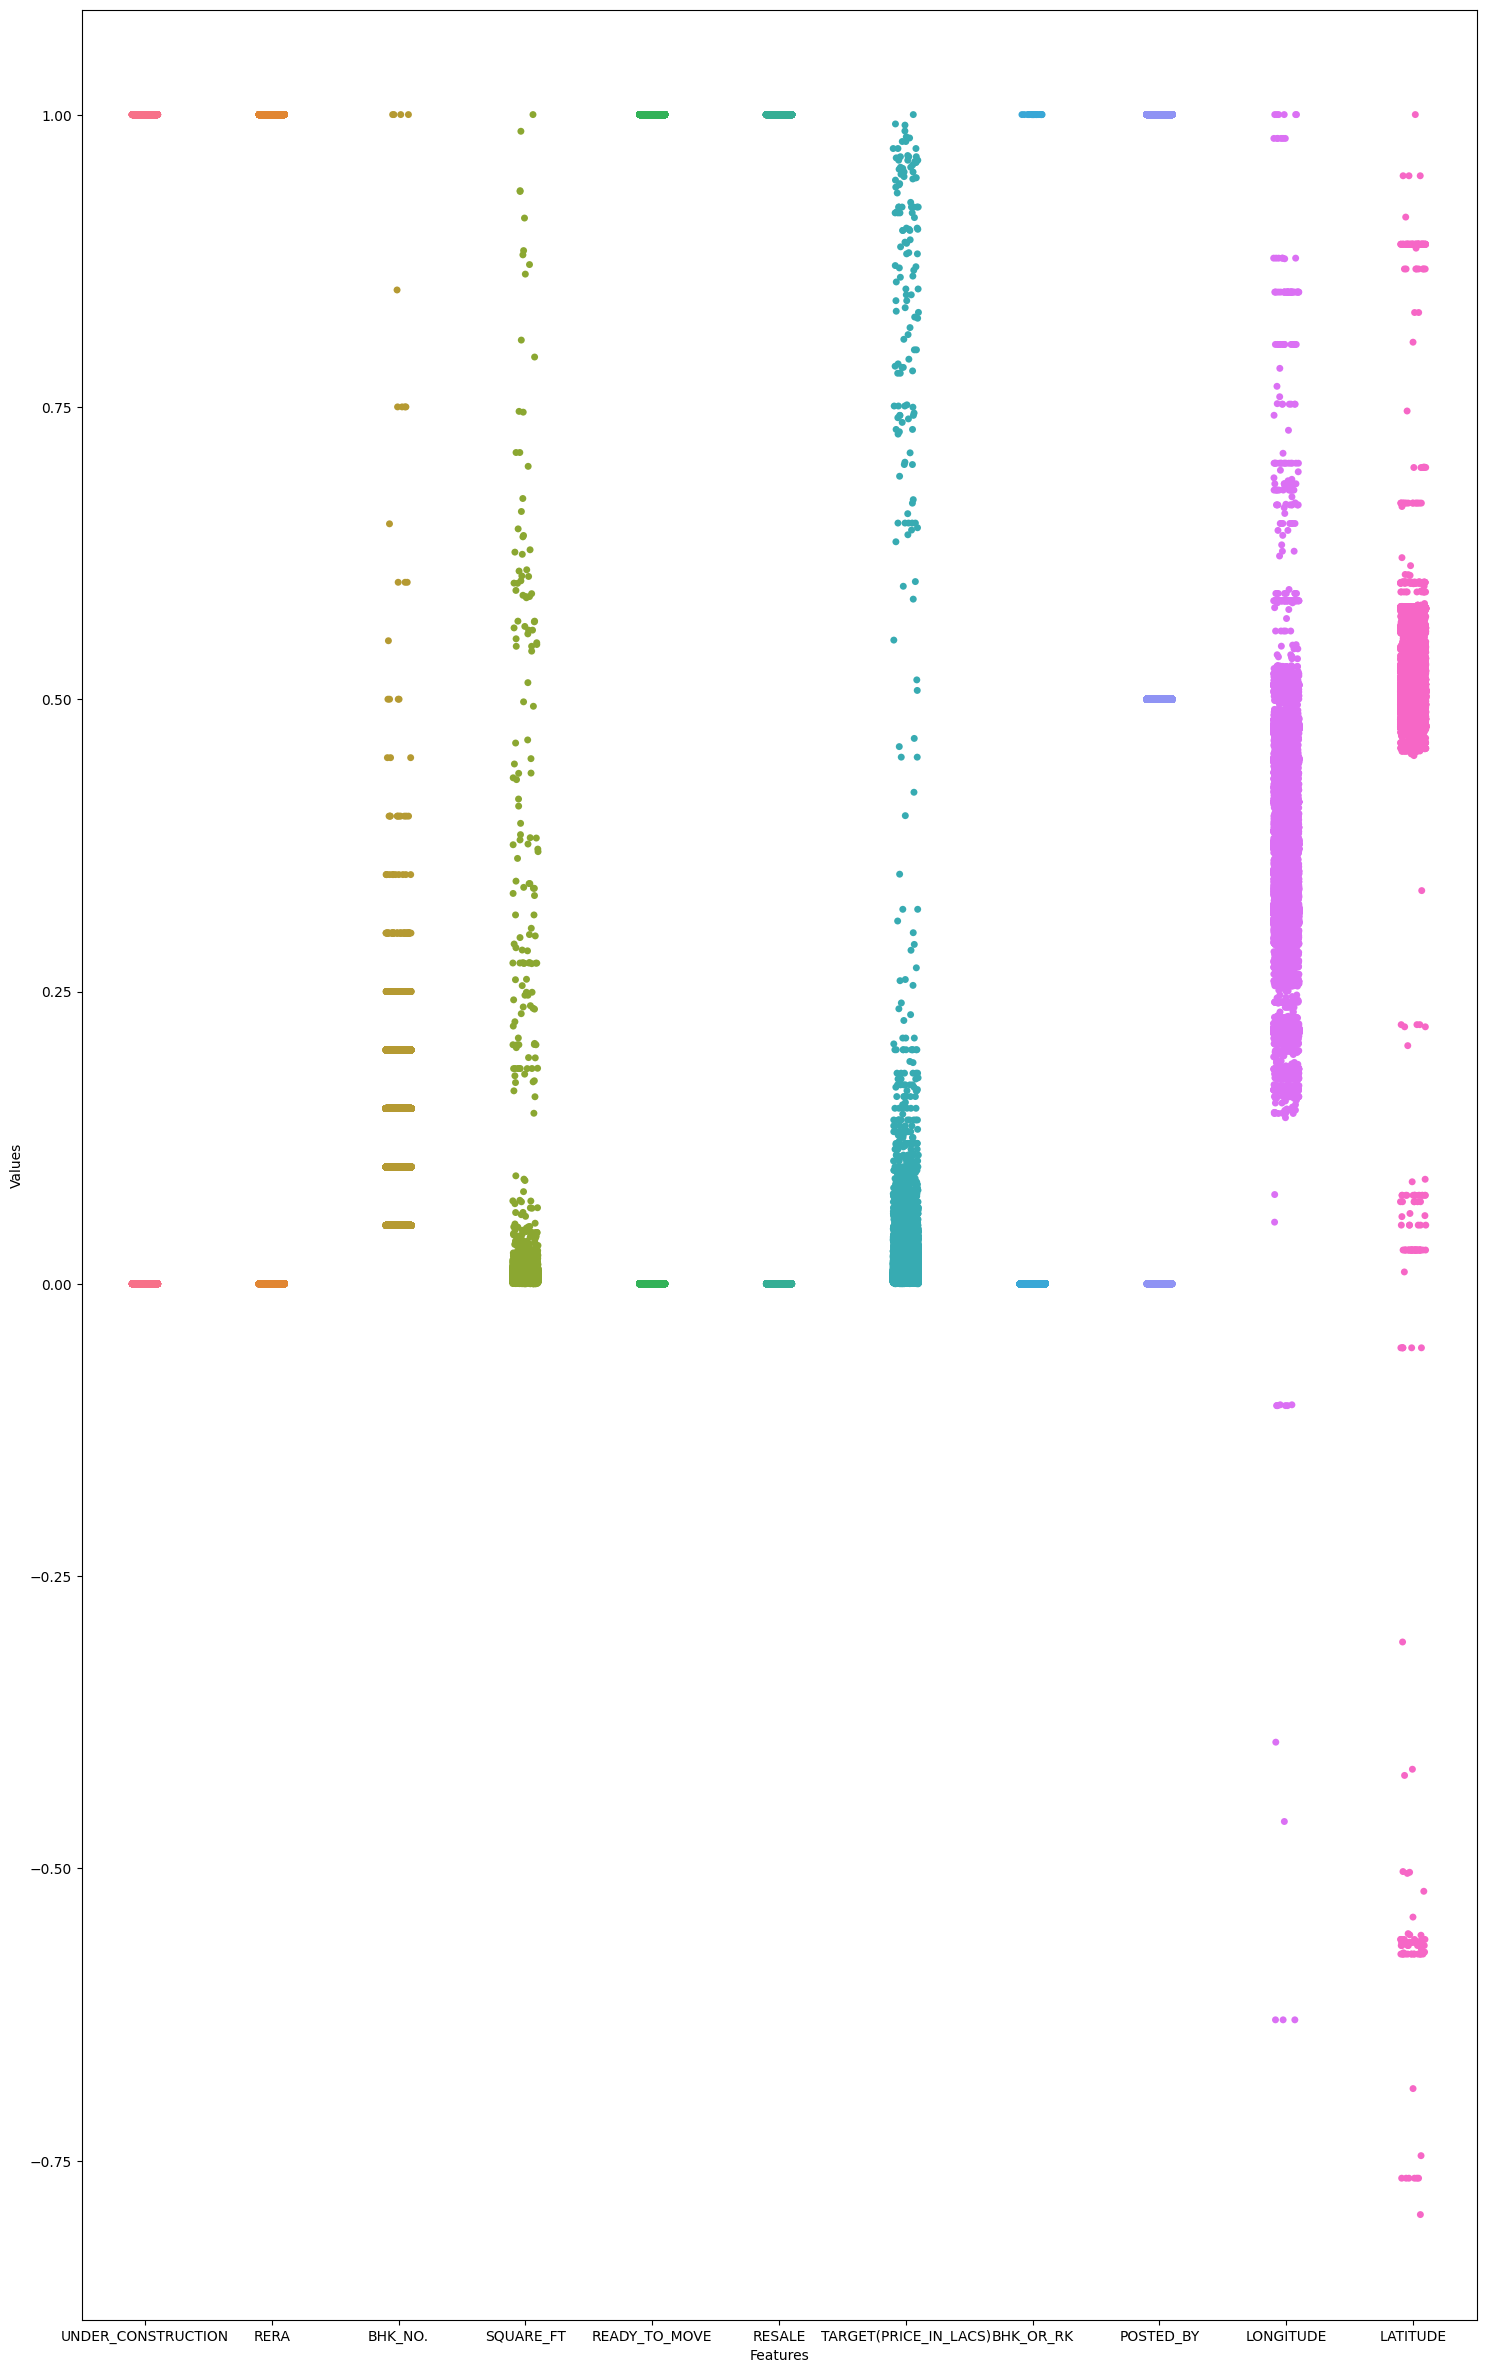

In [45]:
plt.figure(figsize=(18,30))
sns.stripplot(data=df_max_scaled)
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [46]:
X = df_max_scaled[['RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','BHK_OR_RK','POSTED_BY','LONGITUDE','LATITUDE']]
y = df_max_scaled['TARGET(PRICE_IN_LACS)']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


finding best random state

In [48]:
model_ev = []
for i in range(999):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluation = mean_squared_error(y_pred,y_test)
    model_ev.append(evaluation)



In [49]:
min_value = min(model_ev)
min_index = model_ev.index(min_value)

In [50]:
print("Minimum value:", min_value)
print("Index of minimum value:", min_index)

Minimum value: 0.000662464798699356
Index of minimum value: 70


In [51]:
random_state = min_index

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)


In [54]:
mse

0.000662464798699356

In [55]:
mae

0.007945206247877687

In [56]:
def detect_outliers_z_score(data, threshold=3):

    z_scores = (data - np.mean(data)) / np.std(data)
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    return outlier_indices



In [57]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
lr_pred = lr.predict(X_test)

In [62]:
dt_pred = dt.predict(X_test)

In [63]:
rf_pred = rf.predict(X_test)

In [64]:
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

Linear Regression MSE: 0.000662464798699356
Decision Tree MSE: 0.00026576147086162117
Random Forest MSE: 0.00018160842763391706


In [65]:
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))

Linear Regression MAE: 0.007945206247877687
Decision Tree MAE: 0.0039115030667129565
Random Forest MAE: 0.003193473424276738


In [66]:
voting_regressor = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf)])
voting_regressor.fit(X_train, y_train)
voting_pred = voting_regressor.predict(X_test)

In [67]:
print("Voting Regressor MSE:", mean_squared_error(y_test, voting_pred))

Voting Regressor MSE: 0.00021464426776716082


In [68]:
print("Voting Regressor MAE:", mean_absolute_error(y_test, voting_pred))

Voting Regressor MAE: 0.004258165858479948


In [69]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [70]:
model = LinearRegressionGradientDescent(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)


In [71]:
y_pred = model.predict(X_test)

In [72]:
print("Gradient Decent MAE:", mean_absolute_error(y_pred,y_test))

Gradient Decent MAE: 0.012608909013044066


In [73]:
print("Gradient Decent MSE:", mean_squared_error(y_pred, y_test))

Gradient Decent MSE: 0.002715626648820515


In [74]:
model = LinearRegressionGradientDescent(learning_rate=0.001, n_iterations=10000)
model.fit(X_train, y_train)

In [75]:
y_pred = model.predict(X_test)

In [76]:
print("Gradient Decent MAE:", mean_absolute_error(y_pred,y_test))
print("Gradient Decent MSE:", mean_squared_error(y_pred, y_test))

Gradient Decent MAE: 0.012608614981130995
Gradient Decent MSE: 0.0027156309680219756


In [77]:
df['SQUARE_FT']

0        1300.236407
1        1275.000000
2         933.159722
3         929.921143
4         999.009247
            ...     
29446    2500.000000
29447     769.230769
29448    1022.641509
29449     927.079009
29450     896.774194
Name: SQUARE_FT, Length: 29443, dtype: float64

In [78]:
outlier_indices = detect_outliers_z_score(df['SQUARE_FT'], threshold=0.005)
df_filtered = df[np.isin(df.index, outlier_indices)]


In [79]:
from sklearn.model_selection import KFold

In [80]:
k = 10

In [81]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [82]:
mses = []

In [83]:
model = rf

In [84]:
for i, j in kf.split(X):
    X_train, X_test = X.iloc[i], X.iloc[j]
    y_train, y_test = y.iloc[i], y.iloc[j]
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    ev = mean_squared_error(predictions, y_test)
    mses.append(ev)

In [85]:
average_cost = np.mean(mses)

In [86]:
average_cost

0.0001560309858593078

In [87]:
model = voting_regressor

In [88]:
for i, j in kf.split(X):
    X_train, X_test = X.iloc[i], X.iloc[j]
    y_train, y_test = y.iloc[i], y.iloc[j]
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    ev = mean_squared_error(predictions, y_test)
    mses.append(ev)

In [89]:
average_cost = np.mean(mses)
average_cost

0.00020792038456839585

In [90]:
r2_list = []

In [91]:
for i, j in kf.split(X):
    X_train, X_test = X.iloc[i], X.iloc[j]
    y_train, y_test = y.iloc[i], y.iloc[j]
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    ev = r2_score(predictions, y_test)
    r2_list.append(ev)

In [92]:
average_cost = np.mean(r2_list)
average_cost

0.9136651365071067